# first uploading and opening the sata set


first we upload the code to google

In [ ]:
from google.colab import files

uploading_dataset=files.upload()

Saving Egyptian Doctors Data.csv to Egyptian Doctors Data.csv


second we use pandas to open the dataset

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('Egyptian Doctors Data.csv')
df.head()

,Source,web_scraper_order,specialization,fees,avg_rate,waiting_time,clinic_location,rate_count,doctor_views,pages
0,0 (1),1676137334-729,Physiotherapist,65 EGP,5.0,Waiting Time : 15 Minutes,El-Mansoura,From 16 Visitors,"1,707 View(s)",1048
1,1 (1),1676137337-730,Dermatologist,200 EGP,4.5,Waiting Time : 35 Minutes,El-Ibrahimia,From 68 Visitors,"8,188 View(s)",1048
2,2 (1),1676137340-731,Orthopedist,250 EGP,4.5,Waiting Time : 31 Minutes,6th of October,From 29 Visitors,"1,745 View(s)",1048
3,3 (1),1676137343-732,Gynecologist,150 EGP,NaN,NaN,El-Haram,NaN,"1,155 View(s)",1048
4,4 (1),1676137345-733,Dermatologist,200 EGP,5.0,Waiting Time : 20 Minutes,Nasr City,From 90 Visitors,"4,054 View(s)",1048


# filtering the dataset

1- drop the columns that we will not use

In [ ]:
df.drop(columns=['Source','web_scraper_order','pages','rate_count'],inplace=True)
df.head()

,specialization,fees,avg_rate,waiting_time,clinic_location,doctor_views
0,Physiotherapist,65 EGP,5.0,Waiting Time : 15 Minutes,El-Mansoura,"1,707 View(s)"
1,Dermatologist,200 EGP,4.5,Waiting Time : 35 Minutes,El-Ibrahimia,"8,188 View(s)"
2,Orthopedist,250 EGP,4.5,Waiting Time : 31 Minutes,6th of October,"1,745 View(s)"
3,Gynecologist,150 EGP,NaN,NaN,El-Haram,"1,155 View(s)"
4,Dermatologist,200 EGP,5.0,Waiting Time : 20 Minutes,Nasr City,"4,054 View(s)"


2- check that all the data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   specialization   1208 non-null   object 
 1   fees             1209 non-null   object 
 2   avg_rate         1151 non-null   float64
 3   waiting_time     1152 non-null   object 
 4   clinic_location  927 non-null    object 
 5   doctor_views     1208 non-null   object 
dtypes: float64(1), object(5)
memory usage: 56.8+ KB


3- we convert the data types of the column(fees , waiting time , dcotor views) to float

In [ ]:
df['fees'] = df['fees'].str.replace('EGP', '').str.replace(' ', '').str.replace(',','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   specialization   1208 non-null   object 
 1   fees             1209 non-null   float64
 2   avg_rate         1151 non-null   float64
 3   waiting_time     1152 non-null   object 
 4   clinic_location  927 non-null    object 
 5   doctor_views     1208 non-null   object 
dtypes: float64(2), object(4)
memory usage: 56.8+ KB


In [ ]:
import re
def convert_waiting_time_to_hours(waiting_time_str):
    if isinstance(waiting_time_str, str):
        # Extract hours and minutes using regex
        hours_match = re.search(r'(\d+)\s*Hour', waiting_time_str)
        minutes_match = re.search(r'(\d+)\s*Minute', waiting_time_str)

        hours = int(hours_match.group(1)) if hours_match else 0
        minutes = int(minutes_match.group(1)) if minutes_match else 0

        # Convert total time to hours
        total_hours = hours + minutes / 60.0
        return total_hours
    else:
        return None

# Apply the conversion function to the 'waiting_time' column
# Replace 'waiting_time' with the actual name of your column
df['waiting_time'] = df['waiting_time'].apply(convert_waiting_time_to_hours)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   specialization   1208 non-null   object 
 1   fees             1209 non-null   float64
 2   avg_rate         1151 non-null   float64
 3   waiting_time     1152 non-null   float64
 4   clinic_location  927 non-null    object 
 5   doctor_views     1208 non-null   object 
dtypes: float64(3), object(3)
memory usage: 56.8+ KB


In [ ]:
df['doctor_views'] = df['doctor_views'].str.replace('View(s)', '').str.replace(' ', '').str.replace(',','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   specialization   1208 non-null   object 
 1   fees             1209 non-null   float64
 2   avg_rate         1151 non-null   float64
 3   waiting_time     1152 non-null   float64
 4   clinic_location  927 non-null    object 
 5   doctor_views     1208 non-null   float64
dtypes: float64(4), object(2)
memory usage: 56.8+ KB


we finished converting the data types and checked everything

4-we start filtering all the null values


In [ ]:
df.isnull().sum()

specialization       2
fees                 1
avg_rate            59
waiting_time        58
clinic_location    283
doctor_views         2
dtype: int64

we found many null values we will drop the and then check again

In [ ]:
df.dropna(inplace=True)
df.info()
print("\n**********************************************\n")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1209
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   specialization   871 non-null    object 
 1   fees             871 non-null    float64
 2   avg_rate         871 non-null    float64
 3   waiting_time     871 non-null    float64
 4   clinic_location  871 non-null    object 
 5   doctor_views     871 non-null    float64
dtypes: float64(4), object(2)
memory usage: 47.6+ KB

**********************************************



specialization     0
fees               0
avg_rate           0
waiting_time       0
clinic_location    0
doctor_views       0
dtype: int64

now we are sure that there is no null values and that all the data types are correct

5-check for all correct unique possibe values by dividing the data into categorical and numerical

In [ ]:
#find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['specialization', 'clinic_location']


In [ ]:
for var in categorical:
    print('**************************')
    print(var)
    print('---------------------------')
    print(df[var].value_counts())

**************************
specialization
---------------------------
specialization
Dentist                   123
Gynecologist               86
Physiotherapist            75
Cardiologist               67
Dermatologist              67
Orthopedist                63
Internist                  55
Ophthalmologist            49
General Surgeon            37
ENT Doctor                 31
Pediatrician               29
Nutritionist               23
Urologist                  18
Psychiatrist               16
Surgical Oncologist        13
Pulmonologist              12
Neurologist                12
Vascular Surgeon           11
Plastic Surgeon            10
Gastroenterologist         10
Rheumatologist             10
Oncologist                  8
Endocrinologist             8
Neurosurgeon                7
Andrologist                 6
Hepatologist                4
Pediatric Surgeon           4
Nephrologist                3
Obesity Surgeon             3
Audiologist                 2
Allergist      

now we need to check all the possible values in the column clinic location

In [ ]:
df['clinic_location'].unique()

array(['El-Mansoura', 'El-Ibrahimia', '6th of October', 'Nasr City',
       'El-Maadi : Zahraa El Maadi Road Carefour',
       'Shoubra El-Kheima : 15th may', 'Moharam Bek : moharam bek',
       'El-Mohandessin : el Sudan Street',
       'Nasr City : Zaker Hussien Street-District 7',
       'Nasr City : Ibrahim Nawar parallel to Ahmed Fakhry - Sixth Region.',
       'Shoubra El-Kheima', 'El-Zagazig : al kwmya street', 'Shoubra',
       'New Cairo : beside new cairo court',
       'El-Mansoura : sandob square', 'El-Mokattam : Street 9',
       'El-Sheikh Zayed : Mouez plaza-', 'Tanta : Elmoderya st',
       'Shoubra El-Kheima : 15 May, St.', 'El-Zaitoun : Seliem El Awal',
       'Hadayek El-Ahram', 'El-Abbasia', 'El-Mohandessin : ahmed orabi',
       'El-Mokattam', 'El-Maadi : 77 Street Extension - Arab El Maadi',
       'Faisal : faisal main street', 'New Cairo',
       'Nasr City : Ahmed qasim branched from abbas elakaad',
       'Sidy Bishr : 196 Gamal Abdelnasser st, - Beside Baba S

now we check for outliers in the numerical variables and deals with it

In [ ]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['fees', 'avg_rate', 'waiting_time', 'doctor_views']


we found the numerical variables now we can make a boxplot to identify the outliers


In [ ]:
def out_iqr(df , column):
    global lower,upper
    q1, q3 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q3 - q1
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q1 - cut_off, q3 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

The IQR is 130.0
The lower bound value is -25.0
The upper bound value is 495.0
Total number of outliers are 47


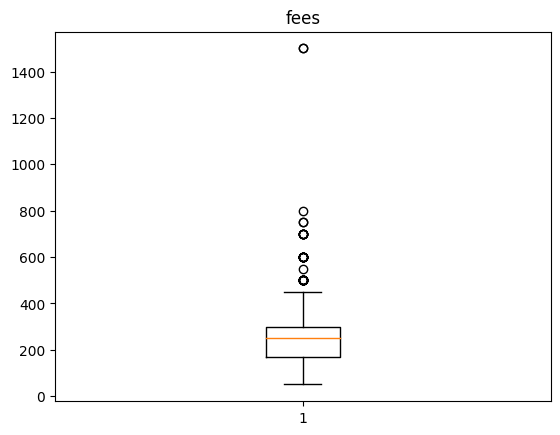

The IQR is 0.5
The lower bound value is 3.75
The upper bound value is 5.75
Total number of outliers are 0


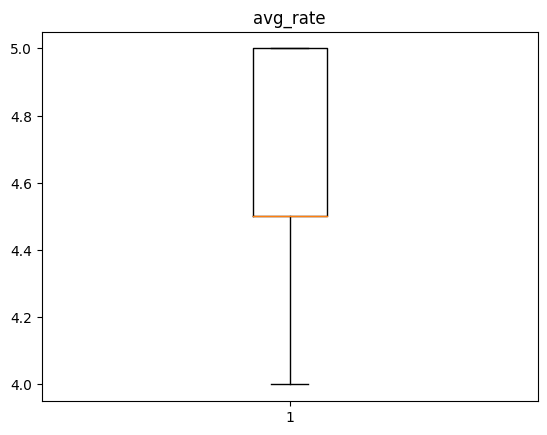

The IQR is 0.31666666666666665
The lower bound value is -0.30833333333333335
The upper bound value is 0.9583333333333333
Total number of outliers are 55


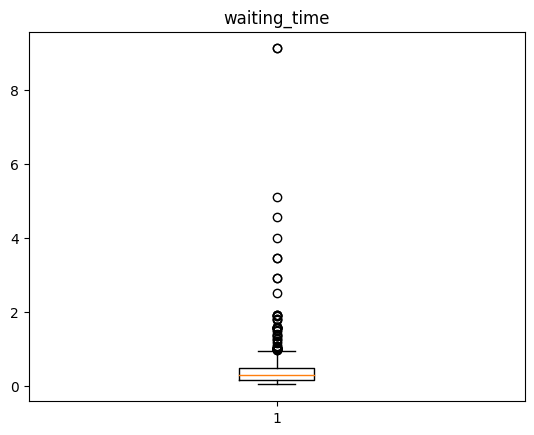

The IQR is 14222.5
The lower bound value is -19630.75
The upper bound value is 37259.25
Total number of outliers are 68


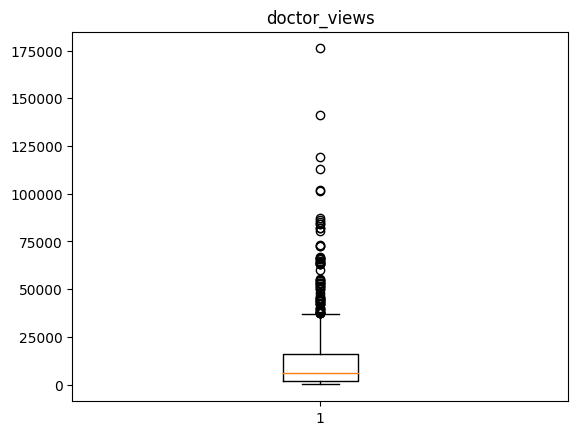

In [ ]:
import matplotlib.pyplot as plt
for n in numerical:
    out_iqr(df,n)
    plt.boxplot(df[n])
    plt.title(n)
    plt.show()

In [ ]:
for n in numerical:
    iqr = df[n].quantile(0.75) - df[n].quantile(0.25)
    lower_bound = df[n].quantile(0.25)-1.5*iqr
    upper_bound = df[n].quantile(0.75)+1.5*iqr
    df[n] = np.where(df[n]>upper_bound,df[n].quantile(0.9), np.where(df[n]<lower_bound,df[n].quantile(0.1),df[n]))
    out_iqr(df,n)

The IQR is 130.0
The lower bound value is -25.0
The upper bound value is 495.0
Total number of outliers are 0
The IQR is 0.5
The lower bound value is 3.75
The upper bound value is 5.75
Total number of outliers are 0
The IQR is 0.31666666666666665
The lower bound value is -0.30833333333333335
The upper bound value is 0.9583333333333333
Total number of outliers are 0
The IQR is 14222.5
The lower bound value is -19630.75
The upper bound value is 37259.25
Total number of outliers are 0


now we have finished the data filtering and cleaning we can start om the analysis


# research question 1:How do fees vary across different specializations in Egypt?

1- we will the distribution between the fees and the specializations

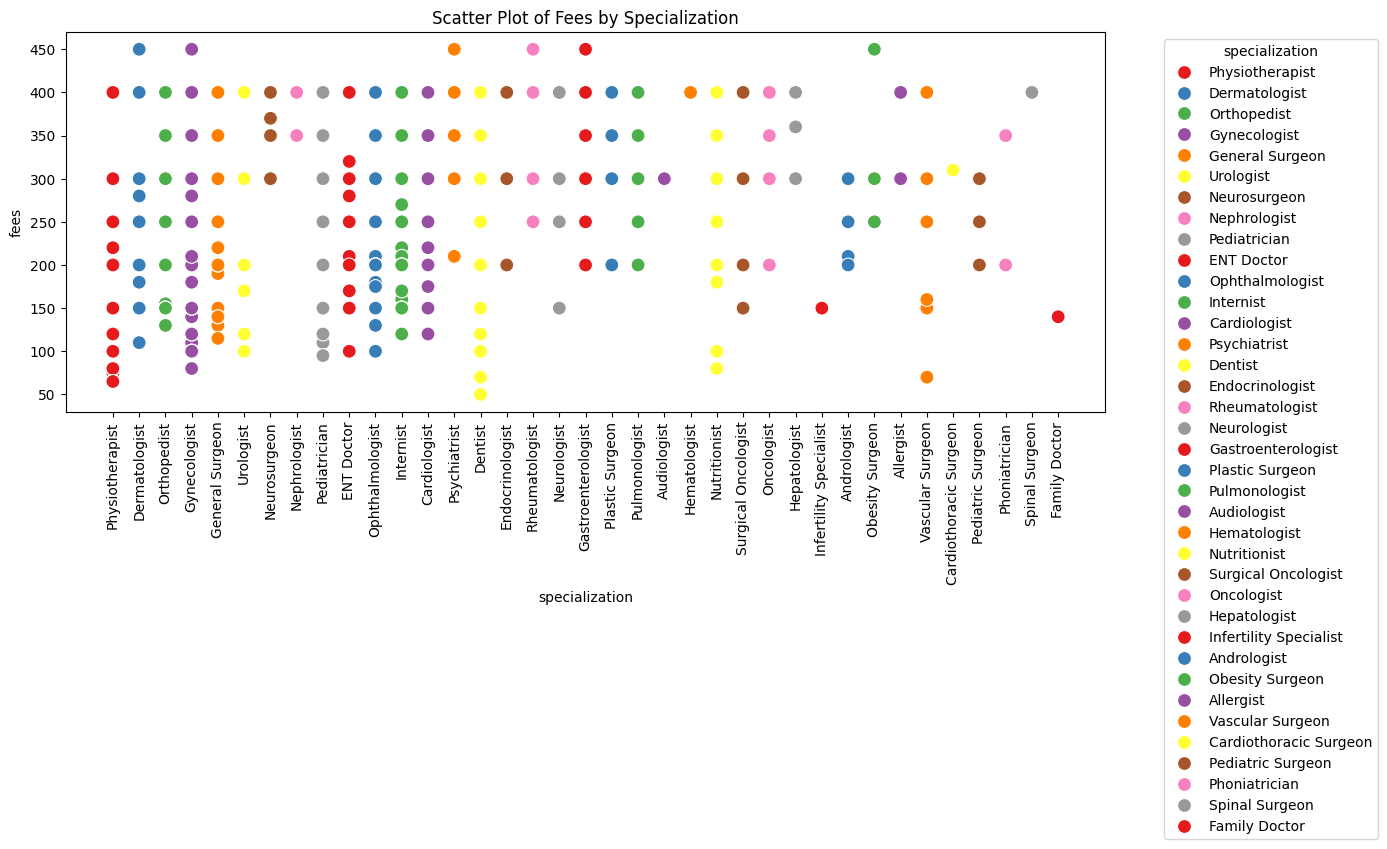

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(x='specialization', y='fees', data=df, hue='specialization', palette='Set1', s=100)

# Customize the plot
plt.title('Scatter Plot of Fees by Specialization')
plt.xlabel('specialization')
plt.ylabel('fees')
plt.xticks(rotation=90)
plt.legend(title='specialization', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


now we will creatye a box plot

<ipython-input-29-034e4954b660>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='specialization', y='fees', data=df, palette='Set3')


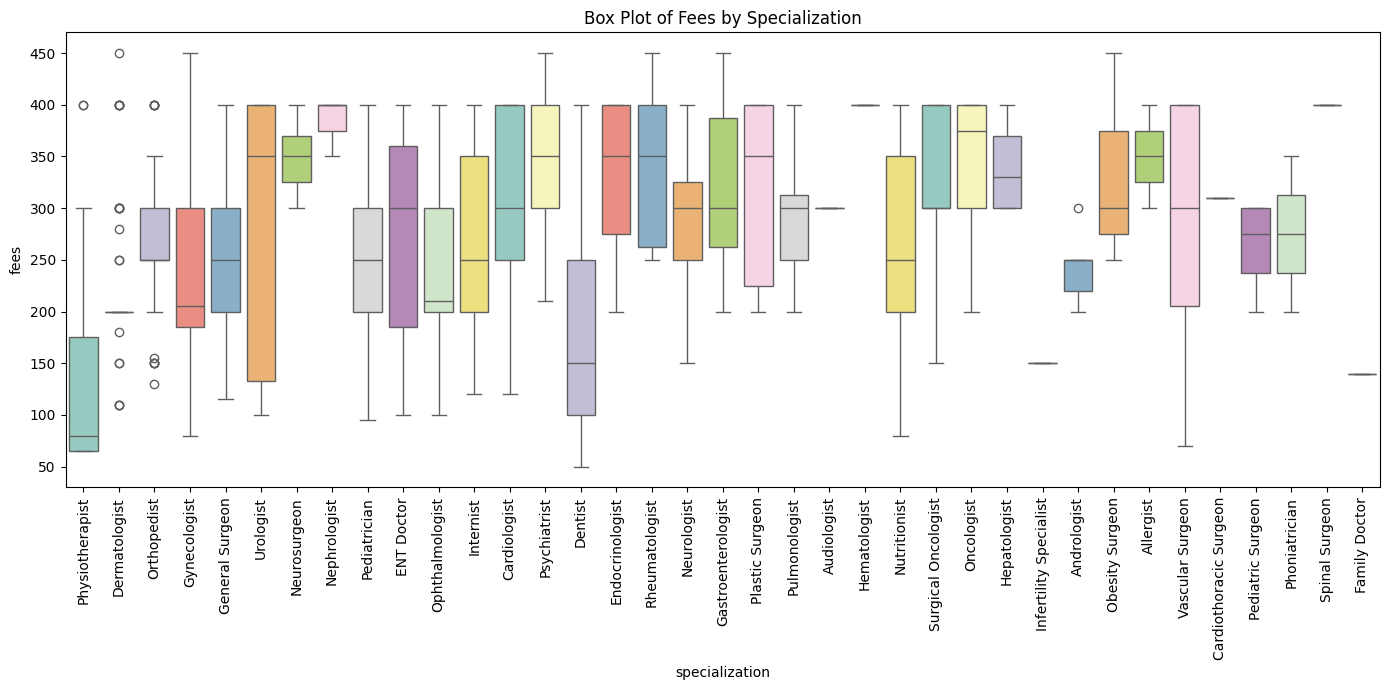

In [ ]:
# Create a box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='specialization', y='fees', data=df, palette='Set3')

# Customize the plot
plt.title('Box Plot of Fees by Specialization')
plt.xlabel('specialization')
plt.ylabel('fees')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

now we will conduct the anova test

F-statistic: 10.11987182383888
P-value: 5.781768677286676e-45


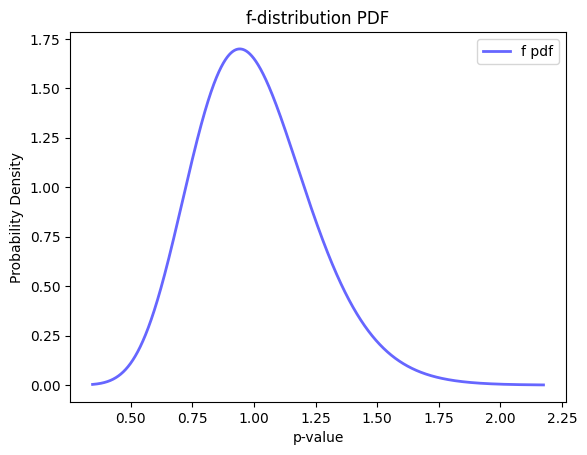

p-value from f-distribution: 1.1102230246251565e-16


In [ ]:
from scipy.stats import f
groups = [group['fees'].values for name, group in df.groupby('specialization')]

# ANOVA
fstat, pvalue = stats.f_oneway(*groups)
print("F-statistic:", fstat)
print("P-value:", pvalue)

dfn = len(groups) - 1  # degrees of freedom numerator
dfd = len(df) - len(groups)  # degrees of freedom denominator

rv = f(dfn, dfd)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100000)
y = rv.pdf(x)

plt.plot(x, y, 'b-', lw=2, alpha=0.6, label='f pdf')
plt.title('f-distribution PDF')
plt.xlabel('p-value')
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.show()

#p-value for observed f-statistic
pvalue = 1 - rv.cdf(fstat)
print("p-value from f-distribution:",pvalue)

#research question2:Does the fees influence the views of the doctor?

In [ ]:
df.head()

,specialization,fees,avg_rate,waiting_time,clinic_location,doctor_views
0,Physiotherapist,65.0,5.0,0.250000,El-Mansoura,1707.0
1,Dermatologist,200.0,4.5,0.583333,El-Ibrahimia,8188.0
2,Orthopedist,250.0,4.5,0.516667,6th of October,1745.0
4,Dermatologist,200.0,5.0,0.333333,Nasr City,4054.0
8,Gynecologist,350.0,4.5,0.200000,6th of October,561.0


from matplotlib import pyplot as plt
_df_22['fees'].plot(kind='hist', bins=20, title='fees')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['avg_rate'].plot(kind='hist', bins=20, title='avg_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['waiting_time'].plot(kind='hist', bins=20, title='waiting_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['doctor_views'].plot(kind='hist', bins=20, title='doctor_views')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('specialization').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('clinic_location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='fees', y='avg_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='avg_rate', y='waiting_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='waiting_time', y='doctor_views', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['fees']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('specialization')):
  _plot_series(series, series_name, i)
  fig.legend(title='specialization', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('fees')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['fees']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clinic_location')):
  _plot_series(series, series_name, i)
  fig.legend(title='clinic_location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('fees')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['avg_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('specialization')):
  _plot_series(series, series_name, i)
  fig.legend(title='specialization', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('avg_rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['avg_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clinic_location')):
  _plot_series(series, series_name, i)
  fig.legend(title='clinic_location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('avg_rate')

from matplotlib import pyplot as plt
_df_35['fees'].plot(kind='line', figsize=(8, 4), title='fees')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['avg_rate'].plot(kind='line', figsize=(8, 4), title='avg_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['waiting_time'].plot(kind='line', figsize=(8, 4), title='waiting_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['doctor_views'].plot(kind='line', figsize=(8, 4), title='doctor_views')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clinic_location'].value_counts()
    for x_label, grp in _df_39.groupby('specialization')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('specialization')
_ = plt.ylabel('clinic_location')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['specialization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='fees', y='specialization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['clinic_location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='fees', y='clinic_location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['specialization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='avg_rate', y='specialization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['clinic_location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='avg_rate', y='clinic_location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

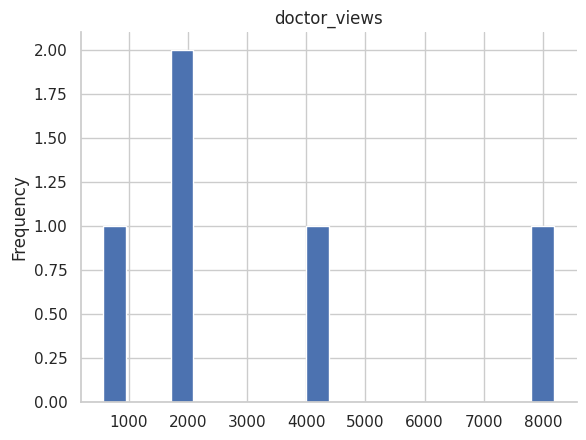

In [ ]:
from matplotlib import pyplot as plt
_df_25['doctor_views'].plot(kind='hist', bins=20, title='doctor_views')
plt.gca().spines[['top', 'right',]].set_visible(False)

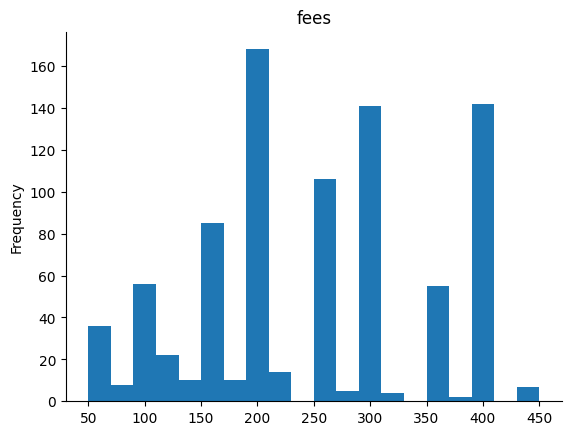

In [ ]:
from matplotlib import pyplot as plt
df['fees'].plot(kind='hist', bins=20, title='fees')
plt.gca().spines[['top', 'right',]].set_visible(False)

now we will calculate the pearson r and the p value

In [70]:
from scipy.stats import pearsonr
variable1 = df['doctor_views']
variable2 = df['fees']
corr, p_value = pearsonr(variable1, variable2)

# Print the results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.19768085354297604
P-value: 4.007676045122018e-09


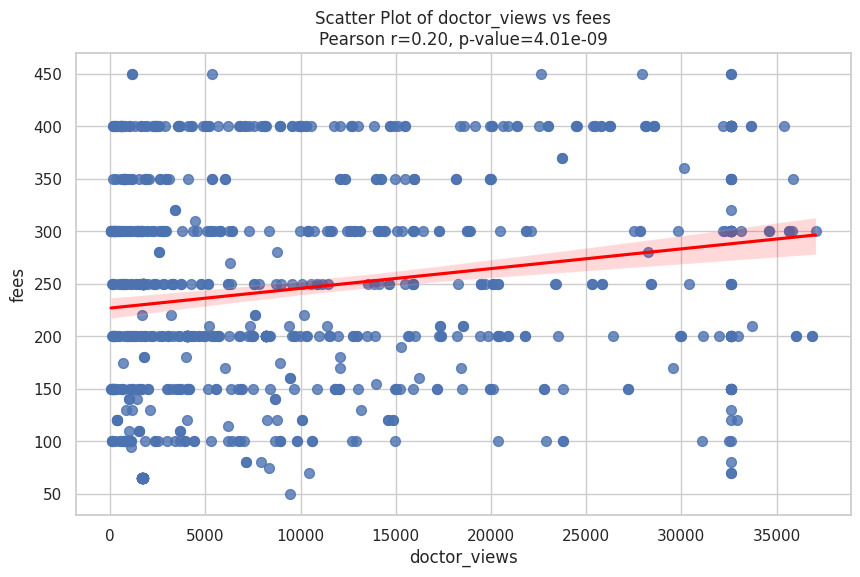

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='doctor_views', y='fees', data=df, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.xlabel('doctor_views')  # Replace with your column name
plt.ylabel('fees')  # Replace with your column name
plt.title(f'Scatter Plot of doctor_views vs fees\nPearson r={corr:.2f}, p-value={p_value:.2e}')
plt.show()

# research question 3:Does the waiting time influence the fees?

find the graph of distribution of the fees

In [ ]:
df.head()

,specialization,fees,avg_rate,waiting_time,clinic_location,doctor_views
0,Physiotherapist,65.0,5.0,0.250000,El-Mansoura,1707.0
1,Dermatologist,200.0,4.5,0.583333,El-Ibrahimia,8188.0
2,Orthopedist,250.0,4.5,0.516667,6th of October,1745.0
4,Dermatologist,200.0,5.0,0.333333,Nasr City,4054.0
8,Gynecologist,350.0,4.5,0.200000,6th of October,561.0


from matplotlib import pyplot as plt
_df_0['fees'].plot(kind='hist', bins=20, title='fees')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['avg_rate'].plot(kind='hist', bins=20, title='avg_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['waiting_time'].plot(kind='hist', bins=20, title='waiting_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['doctor_views'].plot(kind='hist', bins=20, title='doctor_views')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('specialization').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('clinic_location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='fees', y='avg_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='avg_rate', y='waiting_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='waiting_time', y='doctor_views', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['fees']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('specialization')):
  _plot_series(series, series_name, i)
  fig.legend(title='specialization', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('fees')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['fees']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clinic_location')):
  _plot_series(series, series_name, i)
  fig.legend(title='clinic_location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('fees')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['avg_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('specialization')):
  _plot_series(series, series_name, i)
  fig.legend(title='specialization', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('avg_rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['avg_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('waiting_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clinic_location')):
  _plot_series(series, series_name, i)
  fig.legend(title='clinic_location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('avg_rate')

from matplotlib import pyplot as plt
_df_13['fees'].plot(kind='line', figsize=(8, 4), title='fees')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['avg_rate'].plot(kind='line', figsize=(8, 4), title='avg_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['waiting_time'].plot(kind='line', figsize=(8, 4), title='waiting_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['doctor_views'].plot(kind='line', figsize=(8, 4), title='doctor_views')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clinic_location'].value_counts()
    for x_label, grp in _df_17.groupby('specialization')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('specialization')
_ = plt.ylabel('clinic_location')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['specialization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='fees', y='specialization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['clinic_location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='fees', y='clinic_location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['specialization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='avg_rate', y='specialization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['clinic_location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='avg_rate', y='clinic_location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

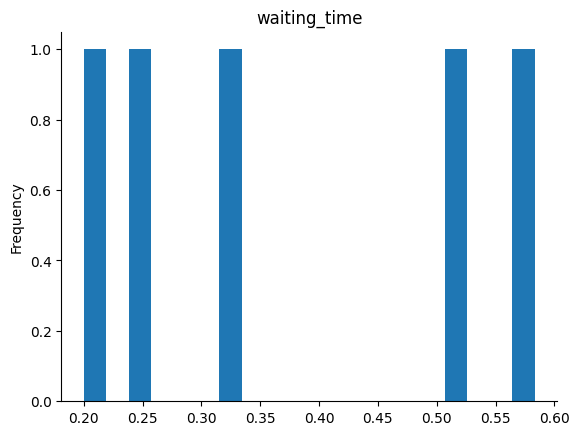

In [ ]:
from matplotlib import pyplot as plt
_df_2['waiting_time'].plot(kind='hist', bins=20, title='waiting_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

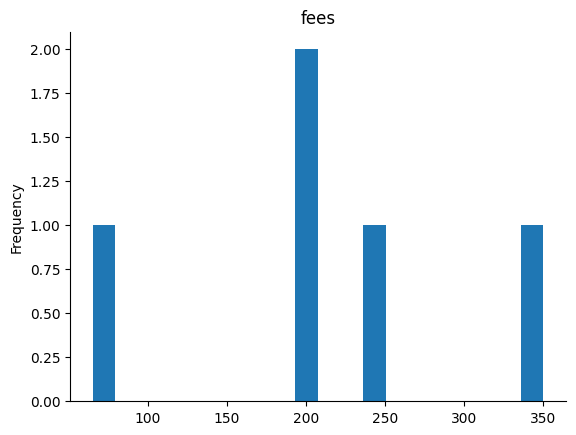

In [ ]:
from matplotlib import pyplot as plt
_df_0['fees'].plot(kind='hist', bins=20, title='fees')
plt.gca().spines[['top', 'right',]].set_visible(False)

now we will calculate the pearson r and the p value

In [ ]:
from scipy.stats import pearsonr
variable1 = df['fees']
variable2 = df['waiting_time']
corr, p_value = pearsonr(variable1, variable2)

# Print the results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.07502645417816026
P-value: 0.0268167145793388


create a graph that represent the relation

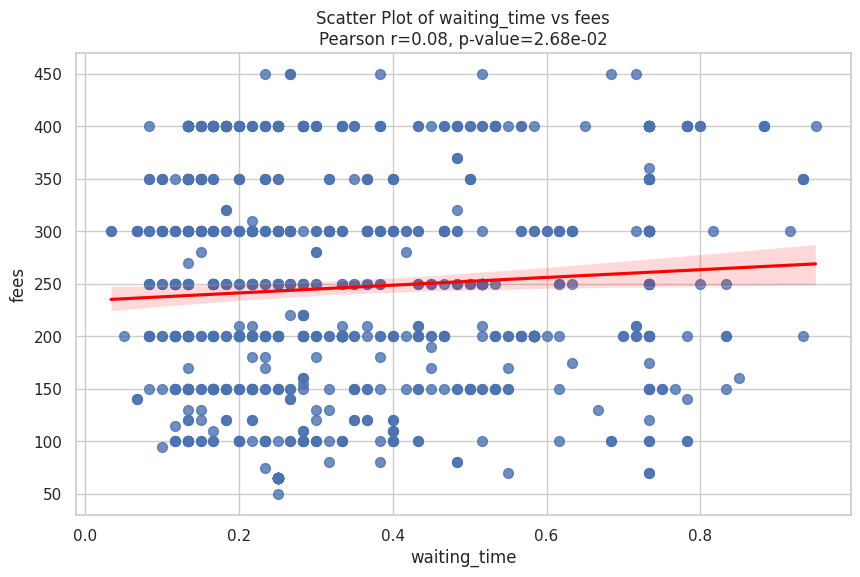

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='waiting_time', y='fees', data=df, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.xlabel('waiting_time')  # Replace with your column name
plt.ylabel('fees')  # Replace with your column name
plt.title(f'Scatter Plot of waiting_time vs fees\nPearson r={corr:.2f}, p-value={p_value:.2e}')
plt.show()

In [ ]:
r=np.corrcoef(df['fees'],df['waiting_time'])
r[0,1]

0.07502645417816037

# research question 4:Does the location of the doctor’s clinic influence the fees?

In [ ]:
# Function to clean the clinic_location column
def clean_location(location):
    return location.split(':')[0].strip()

# Apply the function to the clinic_location column
df['clinic_location'] = df['clinic_location'].apply(clean_location)

unique_locations = df['clinic_location'].nunique()
print(f"Number of unique locations: {unique_locations}")

# Get the count of each unique location
location_counts = df['clinic_location'].value_counts()
print("\nCount of each location:")
print(location_counts)

Number of unique locations: 89

Count of each location:
clinic_location
Nasr City                                         79
El-Mansoura                                       73
6th of October                                    67
Heliopolis                                        53
Faisal                                            46
                                                  ..
El-Amreya                                          1
10 Mohamed Awad st, branched from Makram Ebeid     1
151 Street - Horreya Square                        1
10th of Ramadan                                    1
Loran                                              1
Name: count, Length: 89, dtype: int64


1- we will the distribution between the fees and the specializations

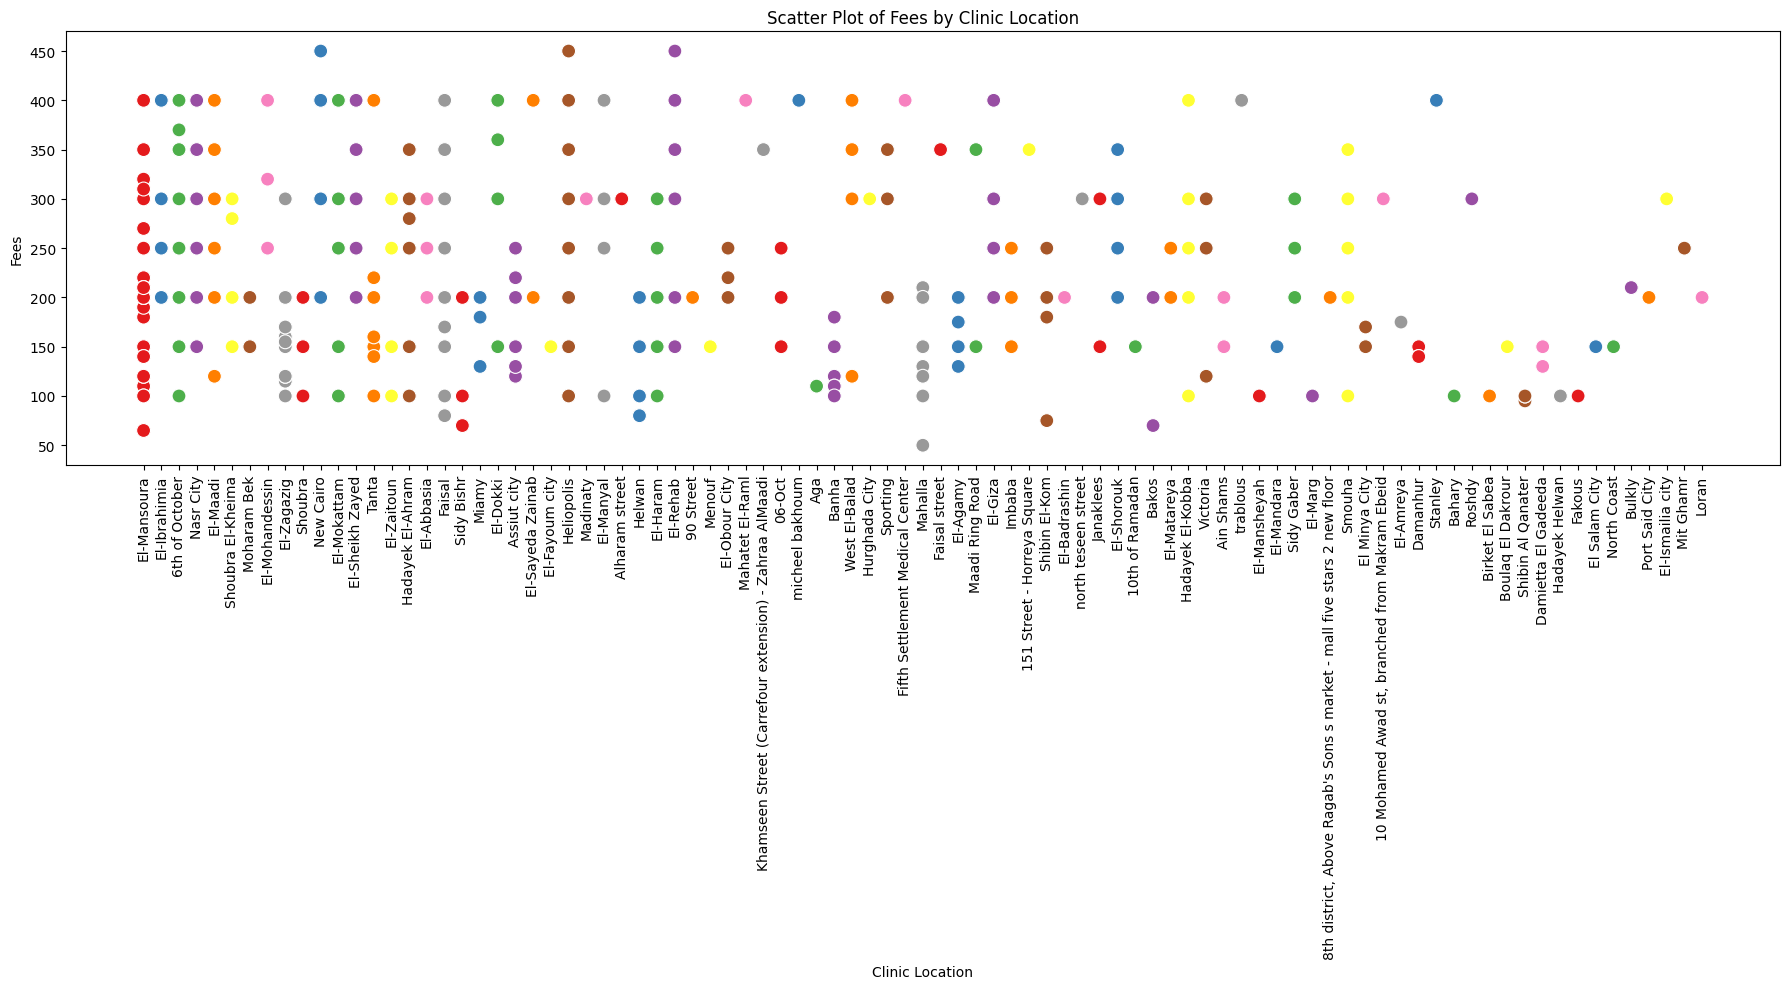

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(18, 10))  # Increase figure size for better readability
sns.scatterplot(x='clinic_location', y='fees', data=df, hue='clinic_location', palette='Set1', s=100, legend=False)

# Customize the plot
plt.title('Scatter Plot of Fees by Clinic Location')
plt.xlabel('Clinic Location')
plt.ylabel('Fees')
plt.xticks(rotation=90)  # Rotate x-tick labels for better readability

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


now we will creatye a box plot

<ipython-input-35-e97650e03f43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clinic_location', y='fees', data=df, palette='Set1')


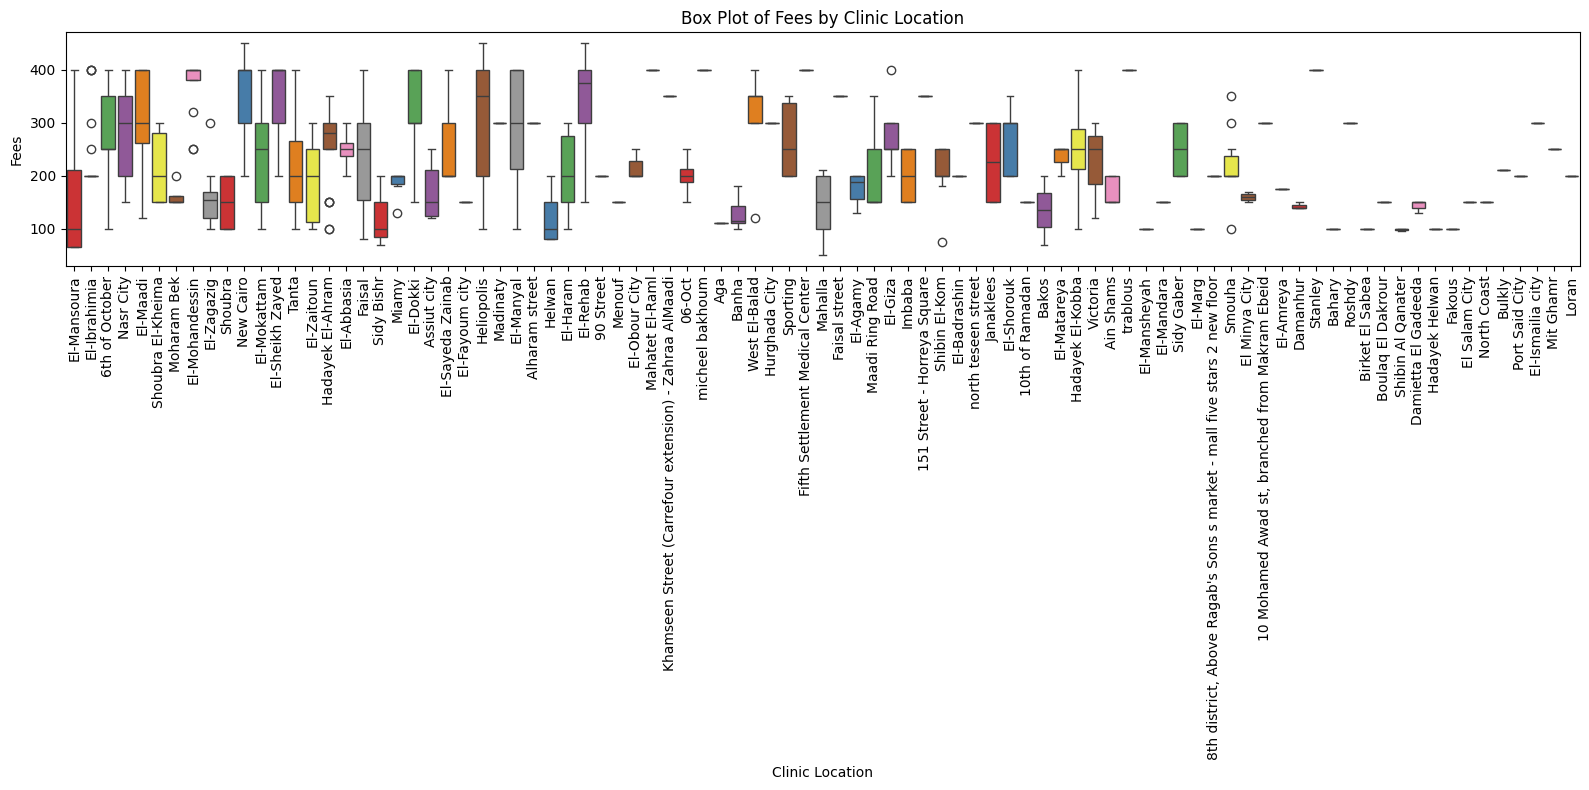

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='clinic_location', y='fees', data=df, palette='Set1')

# Customize the plot
plt.title('Box Plot of Fees by Clinic Location')
plt.xlabel('Clinic Location')
plt.ylabel('Fees')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

now we will conduct the anova test

F-statistic: 8.218034426226838
P-value: 7.383402432330294e-66


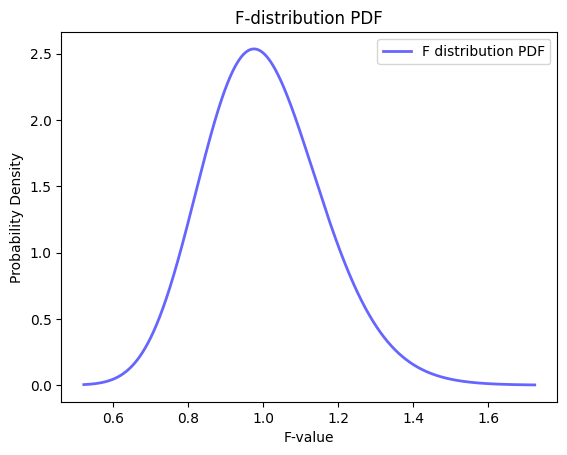

P-value from F-distribution: 1.1102230246251565e-16


In [ ]:
# Apply the function to clean the clinic_location column
df['clinic_location'] = df['clinic_location'].apply(clean_location)

# Group data by clinic_location and get the fees for each group
groups = [group['fees'].values for name, group in df.groupby('clinic_location')]

# Perform ANOVA
fstat, pvalue = stats.f_oneway(*groups)
print("F-statistic:", fstat)
print("P-value:", pvalue)

# Degrees of freedom
dfn = len(groups) - 1  # degrees of freedom numerator
dfd = len(df) - len(groups)  # degrees of freedom denominator

# F-distribution
rv = f(dfn, dfd)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100000)
y = rv.pdf(x)

# Plot the F-distribution
plt.plot(x, y, 'b-', lw=2, alpha=0.6, label='F distribution PDF')
plt.title('F-distribution PDF')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.show()

# P-value for observed F-statistic
pvalue_from_fdist = 1 - rv.cdf(fstat)
print("P-value from F-distribution:", pvalue_from_fdist)